<a href="https://colab.research.google.com/github/OmegaCreations/RaspberryPico-ML-for-data-transfer-filtering/blob/main/model_ml_04022024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -y
!apt-get install python3.8 python3.8-distutils
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!update-alternatives --config python3
!apt-get install python3-pip
!python3 -m pip install --upgrade pip --user

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,333 kB]
Get:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,678 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://ppa.launchpadcontent.net/c2d4u.team/c2

In [ ]:
# imports
! pip install tensorflow==2.8.0
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import f1_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 36.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [ ]:
! pip install tensorflow-model-optimization
import tensorflow as tf
from tensorflow.keras import models
#from tensorflow_model_optimization.sparsity import keras as sparsity
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 4.4 MB/s eta 0:00:00


# Methods for creating data set

In [ ]:
# Generate square
def add_square(img, center, width):
  start_point = (center[0]-width, center[1]-width)
  end_point   = (center[0]+width, center[1]+width)
  cv2.rectangle(img, start_point, end_point, (255, 255, 255),cv2.FILLED)

In [ ]:
# generate sample
def create_data_sample(num_shapes, height, width):
  img = np.zeros((height, width, 3))
  for i in range(num_shapes):
    x = int(np.random.rand()*width)
    y = int(np.random.rand()*height)
    if np.random.rand() > 0.5:
      radius = random.uniform(0.06, 0.2) # random circle radius multiplier
      cv2.circle(img, (x,y), int(np.ceil(width*radius)), (255, 255, 255), cv2.FILLED)
      data_shape = 0
      # Show circle pos
      # cv2.circle(label, (x,y), int(np.ceil(width*0.02)), (1, 1, 1), cv2.FILLED)
    else:
      data_shape = 1
      side = random.uniform(0.07, 0.2) # random square side multiplier
      add_square(img, (x,y), int(np.ceil(width*0.6*side)))
  return img, data_shape


In [ ]:
# def test_batch(num_shapes, height, width):
#   img, data_shape = create_data_sample(num_shapes, height, width)
#   return np.expand_dims(img,0), data_shape

In [ ]:
# def grayscale_image(img):
#   return np.expand_dims((img[:,:,0] + img[:,:,1] + img[:,:,2])/3,2)

In [ ]:
# # (128,128,1) --> (128,128,3)
# def to_three_channels(img):
#   return np.squeeze(np.stack((img,img,img), 2))

In [ ]:
def show_sample(img, shape):
  class_names = ['Circle', 'Square'] # Training shapes list
  plt.imshow(img)
  plt.title(class_names[shape], fontsize=20)
  # the pos info
  # axis[1].imshow(to_three_channels(label))

In [ ]:
def show_sample_group(img_list, shape_list, count):
  table_height = int(count / 4) + 1
  labels = ["Circle", "Square"]
  for i in range(count):
    plt.subplot(table_height, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list[i], cmap=plt.cm.binary)
    plt.xlabel(labels[shape_list[i]])

In [ ]:
# def show_batch(img, shape):
#   show_sample(img[0,:,:,:], shape)

# Method for applying a new model - MobileNetv1

In [ ]:

def create_mobilenetv1_model(input_shape=(96, 96, 1), alpha=0.25):
    input_tensor = Input(shape=input_shape)

    # MobileNetV1 architecture
    base_model = tf.keras.applications.MobileNet(input_shape=(None, None, 3), include_top=False, weights='imagenet', alpha=alpha)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze pre-trained layers

    x = Conv2D(3, (1, 1), padding='same', activation='relu')(input_tensor)  # Convert single-channel to three channels
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)

    output_tensor = Dense(2, activation='softmax')(x)  # Adjust the output layer based on your task

    model = models.Model(inputs=input_tensor, outputs=output_tensor)

    return model
# #

# Sample

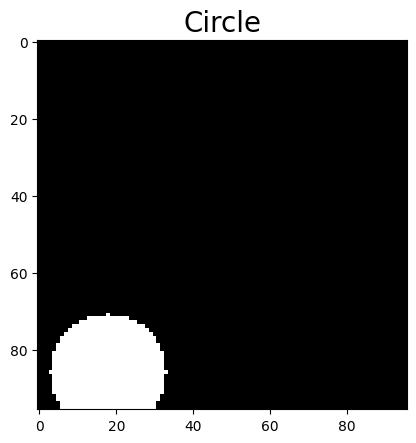

In [ ]:
img_shape = (96, 96, 1) #resolution changed fron 320x240 into 96x96
img, data_shape = create_data_sample(1, img_shape[0], img_shape[1]) # data smaple with 1 shape, height, width
show_sample(img, data_shape)

# Model Training

In [ ]:
# Training model type setup
from tensorflow.keras.layers import Dense
#l2 = keras.regularizers.l2(1e-5)
l2 = None

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, 3, activation='relu', input_shape=(96, 96, 1)),
    tf.keras.layers.AveragePooling2D((2, 2)),  # Replaced MaxPooling with AveragePooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

model_mn1 = create_mobilenetv1_model()
model_mn1.summary()
# #

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 average_pooling2d_1 (Averag  (None, 16, 16, 32)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                524352    
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 524,802
Trainable params: 524,802
Non-trainable params: 0
________________________________________________

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 3)         6         
                                                                 
 mobilenet_0.25_224 (Functio  (None, None, None, 256)  218544    
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 256)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 219,064
Trainable params: 520
Non-trainable p

In [ ]:
# Generate data sample for teaching model
teachingDataSize = 5000

x_list = []
x_type = []
for i in range(teachingDataSize):
  x, y  = create_data_sample(1, img_shape[0], img_shape[1])
  x_list.append(x[:, :, 0:1])
  x_type.append(y)
x_list = np.array(x_list)
x_type = np.array(x_type)

# save dataset

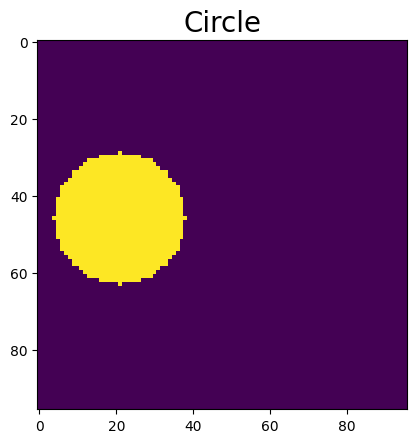

In [ ]:
i = 0
show_sample(x_list[i], x_type[i])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
x_list = x_list.reshape((-1, 96, 96, 1))
##

# Compile the model
model_mn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# #

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # check GPU avaible devices

Num GPUs Available:  0


In [ ]:
# Load pregenerated dataset


In [ ]:
# train model
%whos
# model_history stores history of trained model (accuracy, loss) OF THE SECOND MODEL! TAKE NOTE!
model_history = model.fit(x_list, x_type, epochs=15, batch_size=128)
model_history1 = model_mn1.fit(x_list, x_type, epochs=15, batch_size=128)
# #
# save trained model
model.save('saved_model/my_model')

model_mn1.save('saved_model/mn1_model')
# #

Variable                        Type                           Data/Info
------------------------------------------------------------------------
Conv2D                          type                           <class 'keras.layers.convolutional.Conv2D'>
Dense                           type                           <class 'keras.layers.core.dense.Dense'>
GlobalAveragePooling2D          type                           <class 'keras.layers.pool<...>.GlobalAveragePooling2D'>
Input                           function                       <function Input at 0x7d65f4d09990>
add_square                      function                       <function add_square at 0x7d65e13d3400>
baseline_model_accuracy         float                          0.5856999754905701
baseline_model_accuracy_v1      float                          0.5055000185966492
batch_size                      int                            128
callbacks                       list                           n=2
converter                 

# Load pretrained model below

In [ ]:
model = tf.keras.models.load_model('saved_model/mn1_model')

# Testing Accuracy, Loss & F1 score

In [ ]:
# Generate data sample for testing model
testingDataSize = 10000

x_list_test = []
y_list_test = []
for i in range(testingDataSize):
  x, y  = create_data_sample(1, img_shape[0], img_shape[1])
  x_list_test.append(x[:, :, 0:1])
  y_list_test.append(y)
x_list_test = np.array(x_list_test)
y_list_test = np.array(y_list_test)

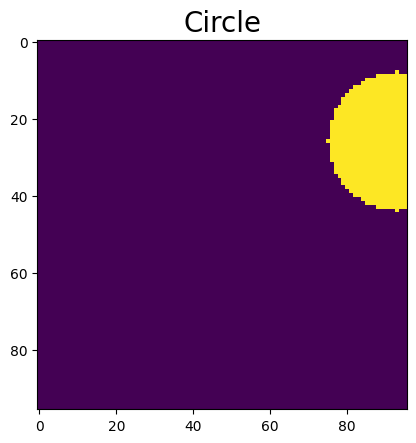

In [ ]:
# Sampling testing data set

show_sample(x_list_test[0], y_list_test[0])

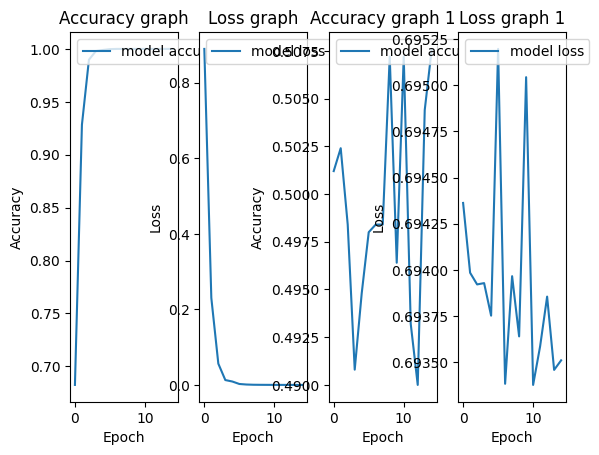

In [ ]:
# plotting accuracy and loss

# BASIC MODEL -------------------------------------
# accuracy
plt.subplot(1, 4, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Accuracy graph') # accuracy per epoch
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['model accuracy'], loc='upper left')

# loss
plt.subplot(1, 4, 2)
plt.plot(model_history.history['loss'])
plt.title('Loss graph') # loss per epoch
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['model loss'], loc='upper left')

# MOBILENET_V1 MODEL -------------------------------------
# accuracy
plt.subplot(1, 4, 3)
plt.plot(model_history1.history['accuracy'])
plt.title('Accuracy graph 1') # accuracy per epoch
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['model accuracy'], loc='upper left')

# loss
plt.subplot(1, 4, 4)
plt.plot(model_history1.history['loss'])
plt.title('Loss graph 1') # loss per epoch
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['model loss'], loc='upper left')

In [ ]:
# Success rate

#probability_model = tf.keras.Sequential([model,
#                                         tf.keras.layers.Softmax()])
#predictions = probability_model.predict(x_list_test)
#predicted_labels = []
#success_rate = 0
#for i in range(testingDataSize):
#  if(np.argmax(predictions[i]) == y_list_test[i]):
#      success_rate += 1
#  predicted_labels.append(np.argmax(predictions[i]))
# show_sample_group(x_list_test, predicted_labels, testingDataSize)
#print("Success rate: ", (success_rate / testingDataSize) * 100, "%")

# F1 score
#f1 = f1_score(y_list_test, predicted_labels) * 100 # (reality, predictions)
#print(f"F1 Score: {f1} %")

#model_mn1.evaluate(x_list_test, y_list_test)
# ======================================================================== Above is useless


# BASIC MODEL -------------------------------------------------------------
# Test model pre pruned and prequantized!
_, baseline_model_accuracy = model.evaluate(
    x_list_test, y_list_test, verbose=0) # evaluate accuracy

print('Baseline test accuracy of [BASIC MODEL]:', baseline_model_accuracy)
_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False) # save the model
print('Saved baseline of [BASIC MODEL] to:', keras_file)


# MOBILENET V1 MODEL ------------------------------------------------------
# Test model pre pruned and prequantized!
_, baseline_model_accuracy_v1 = model_mn1.evaluate(
    x_list_test, y_list_test, verbose=0)

print('Baseline test accuracy of [MOBILENET_V1 MODEL]:', baseline_model_accuracy_v1)
_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_mn1, keras_file, include_optimizer=False)
print('Saved baseline of [MOBILENET_V1 MODEL] to:', keras_file)

Baseline test accuracy of [BASIC MODEL]: 0.9908000230789185
Saved baseline of [BASIC MODEL] to: /tmp/tmpmpr9qh9c.h5
Baseline test accuracy of [MOBILENET_V1 MODEL]: 0.506600022315979
Saved baseline of [MOBILENET_V1 MODEL] to: /tmp/tmpeclsu3wo.h5


# Prune the pretrained model

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set.

# END STEP = ????
# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=1024)
}

# BASIC MODEL -------------------------------------------------------------------------
model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# summary
model_for_pruning.summary()

# MOBILENET V1 MODEL ------------------------------------------------------------------
model_for_pruning_v1 = prune_low_magnitude(model_mn1, **pruning_params)
model_for_pruning_v1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning_v1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d_  (None, 32, 32, 32)       610       
 2 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_average  (None, 16, 16, 32)       1         
 _pooling2d_1 (PruneLowMagni                                     
 tude)                                                           
                                                                 
 prune_low_magnitude_flatten  (None, 8192)             1         
 _1 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_dense_3  (None, 64)               1048642   
  (PruneLowMagnitude)                                            
                                                      

In [ ]:
# Evaluate the model pruning
import tempfile
log_dir = tempfile.mkdtemp()
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir = log_dir),
]

# BASIC MODEL -----------------------
model_for_pruning.fit(x_list, x_type,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

# MOBILENET V1 MODEL -----------------------
model_for_pruning_v1.fit(x_list, x_type,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


36/36 [==============================] - 6s 65ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 0.0055 - val_accuracy: 0.9980
Epoch 2/2
36/36 [==============================] - 3s 80ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0025 - val_accuracy: 0.9980
Epoch 1/2
36/36 [==============================] - 36s 583ms/step - loss: 0.6944 - accuracy: 0.4980 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 2/2
36/36 [==============================] - 19s 526ms/step - loss: 0.6937 - accuracy: 0.4918 - val_loss: 0.6930 - val_accuracy: 0.5180


In [ ]:
# Generate AGAIN data sample for testing
testingDataSize = 10000

x_list_test = []
y_list_test = []
for i in range(testingDataSize):
  x, y  = create_data_sample(1, img_shape[0], img_shape[1])
  x_list_test.append(x[:, :, 0:1])
  y_list_test.append(y)
x_list_test = np.array(x_list_test)
y_list_test = np.array(y_list_test)

In [ ]:
# Test pruned BASIC MODEL
_, model_for_pruning_accuracy = model_for_pruning.evaluate(
   x_list_test, y_list_test, verbose=0)

print('[Basic Model] Baseline test accuracy:', baseline_model_accuracy)
print('[Basic Model] Pruned test accuracy:', model_for_pruning_accuracy)

# Test pruned MOBILENET_V1 MODEL
_, model_for_pruning_accuracy_v1 = model_for_pruning_v1.evaluate(
   x_list_test, y_list_test, verbose=0)

print('[Mobilenet v1 Model] Baseline test accuracy:', baseline_model_accuracy_v1)
print('[Mobilenet v1 Model] Pruned test accuracy:', model_for_pruning_accuracy_v1)

[Basic Model] Baseline test accuracy: 0.9908000230789185
[Basic Model] Pruned test accuracy: 0.9882000088691711
[Mobilenet v1 Model] Baseline test accuracy: 0.506600022315979
[Mobilenet v1 Model] Pruned test accuracy: 0.507099986076355


# Model Export


In [ ]:
# BASIC MODEL -------------------
for layer in model.layers:
    layer.trainable = False
model.summary()
model.save('frozen_model.h5')

# MOBILENET V1 MODEL ------------
for layer in model_mn1.layers:
    layer.trainable = False

model_mn1.save('frozen_mobilenetv1_model.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 average_pooling2d_1 (Averag  (None, 16, 16, 32)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                524352    
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 524,802
Trainable params: 0
Non-trainable params: 524,802
________________________________________________

Quantization is a process of reducing the precision of the weights and activations in a model, typically from 32-bit floating-point to 8-bit integer. This can significantly reduce the model size, making it more suitable for deployment on memory-constrained devices like microcontrollers.

To quantize a model for TensorFlow Lite, you can follow these steps:

    Train the Model:
        Train your model as usual, making sure it performs well on your task.

    Quantize the Model:
        After training, apply quantization to the model. TensorFlow provides tools for quantizing a model using the TensorFlow Lite Converter.

Here's an example of how you can quantize your model:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# BASIC MODEL --------------------------------------------------------------
# Assuming you have your trained model
model = models.load_model('frozen_model.h5')

# Convert the model to TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the quantized model to a file
with open('quantized_model.tflite', 'wb') as f:
    f.write(tflite_quantized_model)

# MOBILENET V1 MODEL -------------------------------------------------------
# Assuming you have your trained MobileNetV1 model
model_mn1 = models.load_model('frozen_mobilenetv1_model.h5')

# Convert the MobileNetV1 model to TensorFlow Lite format with quantization
converter_mn1 = tf.lite.TFLiteConverter.from_keras_model(model_mn1)
converter_mn1.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quantized_model_mn1 = converter_mn1.convert()

# Save the quantized MobileNetV1 model to a file
with open('quantized_model_mn1.tflite', 'wb') as f:
    f.write(tflite_quantized_model_mn1)





In [ ]:
! apt-get -qq install xxd
! xxd -i quantized_model.tflite > trimera_model.c
! xxd -i quantized_model_mn1.tflite > trimera_model_mn1.c
! ls -l
! zip model.zip trimera_model.c
! zip model_mn1.zip trimera_model_mn1.c

total 13032
-rw-r--r-- 1 root root 1055872 Feb  4 23:30 frozen_mobilenetv1_model.h5
-rw-r--r-- 1 root root 6332272 Feb  4 23:30 frozen_model.h5
-rw-r--r-- 1 root root  299544 Feb  4 23:31 quantized_model_mn1.tflite
-rw-r--r-- 1 root root  528872 Feb  4 23:31 quantized_model.tflite
drwxr-xr-x 1 root root    4096 Feb  1 14:21 sample_data
drwxr-xr-x 4 root root    4096 Feb  4 22:09 saved_model
-rw-r--r-- 1 root root 3261473 Feb  4 23:31 trimera_model.c
-rw-r--r-- 1 root root 1847291 Feb  4 23:31 trimera_model_mn1.c
  adding: trimera_model.c (deflated 79%)
  adding: trimera_model_mn1.c (deflated 79%)


In [ ]:
! ls -l
